<a href="https://colab.research.google.com/github/wuchenyu38/18ma573chenyuwu/blob/master/src/Important_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since we know the:

$$
p(x)=\frac{1}{C}(2I_{(0,\frac{1}{100})}(x)+I_{(\frac{1}{100},1)}(x))
$$

and the cdf: F(x) can be calculated from pdf: p(x) by:
$$
F(x)=\int_{-\infty}^{+\infty}p(x)dx
$$

For the given pdf formula, F(x) is zero when x is smaller than zero, So:
$$
F(x)=\int_0^{x}p(x)dx
$$

$$
F(x)=\int_0^x{(\frac{1}{C}(2I_{(0,\frac{1}{100})}(x)+I_{(\frac{1}{100},1)}(x))dx})
\\
F(x)=\frac{1}{C}(2xI_{(0,\frac{1}{100})}(x)+ (x+\frac{1}{100})I_{(\frac{1}{100},1)}(x))
\\
\int_{-\infty}^{+\infty} p(x)=\frac{1}{C}(\frac{2}{100}+\frac{99}{100})=1
\\
C=\frac{101}{100}
$$
Then we can get formula of F(x)
$$
F(x)=\frac{100}{101}(2xI_{(0,\frac{1}{100})}(x)+ (x+\frac{1}{100})I_{(\frac{1}{100},1)}(x))
$$

In order to get the inverse transform $F^{-1}(x)$

From $2xI_{(0,\frac{1}{100})}(x)$ we can get the boundry value of $y$ is $\frac{2}{100}$ 

Then we set the formula of $F^{-1}(x)$ is:
$$
F^{-1}(x)=\frac{101}{100}\frac{1}{2}yI_{(0,\frac{2}{100})}(y)+ (\frac{101}{100}y-\frac{1}{100})I_{(\frac{2}{100},1)}(y)
$$

3.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [0]:
def h(x): #define function h(x)
  return 100*(x<=1/100)+1*(1/100<x<1)

def pdf_1(x): #p(x)
  C=101/100
  return (1/C)*(2*(x<=1/100)+1*(1/100<x<1))

def inverse_transform_f(x): #F^{-1}(x)
  C=101/100
  return (1/2)*C*x*((C*x)<=2/100)+(C*x-1/100)*(2/100<(C*x)<101/100)
  
def importance_sampling_integral(h,inverse_transform_f,pdf_1,n): #get the sigmabar here.
  Y=np.random.uniform(low=0,high=1,size=n)
  X=[inverse_transform_f(x) for x in Y]
  res=[h(m)/pdf_1(m) for m in X]
  return 1/n*sum(res)

In [63]:
importance_sampling_integral(h,inverse_transform_f,pdf_1,500)

2.197759999999993

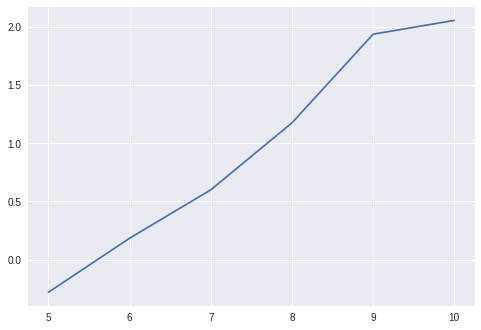

In [36]:
m=100
alpha=np.zeros((6,m))
sigma=[]
for i in range(5,11):
  alpha[i-6]=np.array([importance_sampling_integral(h,inverse_transform_f,pdf_1,2**i) for _ in range(m)])
  sigma.append(np.std(alpha[i-6]))
xx=[i for i in range(5,11)]
yy=-np.log2(sigma)
plt.plot(xx,yy)
plt.show()

In [37]:
out = ss.linregress(xx,yy)
print('----->>>the convergence order is ' + str(out[0]))

----->>>the convergence order is 0.5003304268718556


Here we replace the calculated C value with the value we calculated from last lecture:
$C = \frac{199}{100}$

In [0]:
def pdf_2(x):  #Basically here we replaced all C value with 199/100, rest kept same.
  C=199/100
  return (1/C)*(100*(x<=1/100)+1*(1/100<x<1))

def inverse_transform_f2(x):
  C=199/100
  return (1/100)*C*x*((C*x)<=1)+(C*x-99/100)*(1<(C*x)<199/100)
  
def importance_sampling_integral2(h,inverse_transform_f,pdf_1,n):
  Y=np.random.uniform(low=0,high=1,size=n)
  X=[inverse_transform_f2(x) for x in Y]
  res=[h(m)/pdf_2(m) for m in X]
  return 1/n*sum(res)

In [68]:
importance_sampling_integral2(h,inverse_transform_f2,pdf_2,500) #compare to first C value, this test is pretty deterministic.

1.9900000000000075